<a href="https://colab.research.google.com/github/vannis422/vision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# 載入 MNIST 資料並進行影像前處理
# PyTorch 官方範例連結：https://github.com/pytorch/examples/blob/main/mnist_forward_forward/main.py#L160C23-L160C43

transform = transforms.Compose([transforms.ToTensor()]) # 不進行前處理，但把讀進來的資料轉為 tensors

# 進行資料前處理，將數值轉為 -1 到 1 之間
# MNIST 影像的數值是 0 ~ 255，且是灰階影像 (只有一個 channel)
# 因此 transforms.Normalize 函數內的數字要設為 (0.5,), (0.5,)，第一個數字代表 mean；第二個數字代表 std
# 如果是彩色影像的話，transforms.Normalize 函數內的數字要改為 (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
# transform = transforms.Compose(
#     [
#         transforms.ToTensor(),
#         transforms.Normalize((0.5,), (0.5,)), # PyTorch 官方建議 (0.1307,), (0.3081,)
#     ]
# )

# 載入 MNIST 資料
# `train=False` 代表載入 test 資料
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.54MB/s]


In [4]:
print(f"MNIST 訓練資料有 {len(trainset)} 筆")
print(f"MNIST 測試資料有 {len(testset)} 筆")

MNIST 訓練資料有 60000 筆
MNIST 測試資料有 10000 筆


In [5]:
# 沒有 ToTensor()
tmp = torchvision.datasets.MNIST(root="./data", train=False, download=True)

# 取得第一張圖片和標籤
image, label = tmp[0]
print(f"image 的資料格式為: {type(image)}")

image 的資料格式為: <class 'PIL.Image.Image'>


In [6]:
# Jupyter Notebook 內建支援顯示 PIL 影像
# 所以直接輸入在程式格中執行後會自動顯示原始影像

image

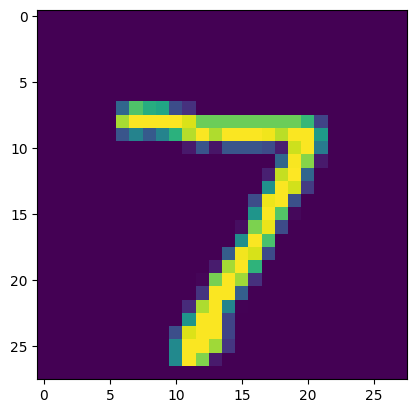

In [7]:
# maplotlib 的 imshow 功能可以顯示 PIL 影像
# 但如果是灰階影像的話，它會幫套上 colormap，所以看起來很像彩色影像

plt.imshow(image)
# plt.imshow(image, cmap="gray") # 若資料是灰階影像，應加上 cmap="gray"

In [8]:
# 觀察有進行 ToTensor() 後的資料

# 取得第一張圖片和標籤
image, label = trainset[0]
print(f"image 的資料格式為: {type(image)}")

image 的資料格式為: <class 'torch.Tensor'>


In [9]:
image.shape

torch.Size([1, 28, 28])

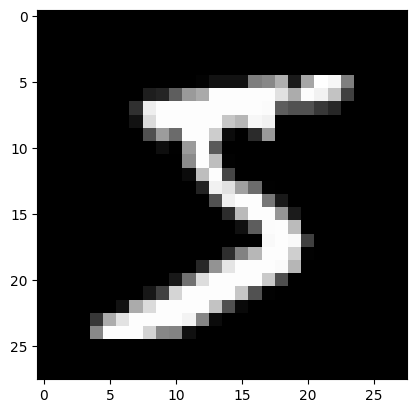

In [10]:
plt.imshow(image.squeeze(), cmap="gray")

In [15]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__() # 繼承 nn.Module 類別的初始化函數
        hidden_size1 = 256 # 第一層隱藏層的神經元數量
        hidden_size2 = 128 # 第二層隱藏層的神經元數量

        self.layer_1 = nn.Linear(28*28, hidden_size1)
        self.layer_2 = nn.Linear(256, hidden_size2)
        self.cls_layer = nn.Linear(hidden_size2, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28) # 將輸入的 x 轉為 28*28 的形狀 (因為 transform.ToTensor() 會把圖片轉為 1*28*28)
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.cls_layer(x)
        return
trainset, valset = train_test_split(trainset, test_size=0.1, random_state=42)
print(f"MNIST 訓練資料有 {len(trainset)} 筆")
print(f"MNIST 訓練資料有 {len(valset)} 筆")
print(f"MNIST 測試資料有 {len(testset)} 筆")

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

MNIST 訓練資料有 48600 筆
MNIST 訓練資料有 5400 筆
MNIST 測試資料有 10000 筆


In [16]:
train_iter = iter(train_loader)  # 取得迭代器
batch_x, batch_y = next(train_iter) # 取出一個 batch
print(batch_x)
print(batch_y)
print(batch_x.shape)
print(batch_y.shape)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.